In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from scipy.stats import f_oneway
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




In [2]:
hot_encoded = pd.read_pickle('final_actors_19_12_2024_2.pkl')


In [3]:
hot_encoded

,ActorName,ActorDOB,ActorGender,ActorAgeAtRelease,Characters,primaryProfession,new_id,Countries,YearOfRelease,ratings,...,Sideburns,Straight_Hair,Wavy_Hair,professionCategory,Male,socioeconomic_background_encoded,education_level_encoded,early_life_opportunities_encoded,AvgRuntime,professionCategory_encoded
0,'Big' Lee,1939,M,[nan],[Junkie in Casino],actor,[23010798],[United States of America],[1973],[5.7],...,NaN,NaN,NaN,ActingOcc,0.0,1,1,0,116.000000,1
1,'Chicken' Holleman,None,None,[nan],[nan],None,[1873017],[United States of America],[1972],[6.0],...,NaN,NaN,NaN,ActingOcc,NaN,2,1,1,88.000000,1
2,'Evil' Ted Smith,None,None,[nan],[Ronnie],"art_department,actor,visual_effects","[3866200, tt7850334, tt16235342]","[United States of America,Japan, nan, nan]","[1991, 2019, 2022]","[4.9, 3.9, 4.3]",...,NaN,NaN,NaN,otherOcc,NaN,2,2,2,91.333333,0
3,'Kecske' Molnár Levente,None,M,[nan],[Ovidiu],None,[31935934],"[France,Romania,Hungary]",[2010],[6.9],...,NaN,NaN,NaN,ActingOcc,0.0,1,1,2,100.000000,1
4,'King Kong' Kashey,1903-11-28,M,[39.0],[Paj Mab's Guard #2],actor,[24051101],[United States of America],[1943],[4.5],...,NaN,NaN,NaN,ActingOcc,0.0,0,2,2,43.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119222,都はるみ,1948-02-22,F,[35.0],[nan],None,[25896239],[Japan],[1983],[6.4],...,NaN,NaN,NaN,ActingOcc,1.0,2,1,2,101.000000,1
119223,關淑怡,1966-08-15,F,"[26.0, 30.0]","[nan, nan]",None,"[26669413, 184987]","[Hong Kong, Hong Kong]","[1992, 1997]","[4.9, 7.7]",...,NaN,NaN,NaN,ActingOcc,1.0,2,2,2,90.000000,1
119224,陳文媛,1979-09-18,F,[23.0],[nan],None,[3059526],"[Thailand,Hong Kong]",[2003],[3.0],...,NaN,NaN,NaN,ActingOcc,1.0,2,0,2,90.000000,1
119225,陳曉東,1975-09-03,M,"[22.0, 36.0]","[nan, nan]",None,"[7055021, 34430625]","[Hong Kong, Singapore]","[1998, 2012]","[6.1, 5.5]",...,NaN,NaN,NaN,ActingOcc,0.0,0,2,2,118.500000,1


In [4]:
hot_encoded.columns

Index(['ActorName', 'ActorDOB', 'ActorGender', 'ActorAgeAtRelease',
       'Characters', 'primaryProfession', 'new_id', 'Countries',
       'YearOfRelease', 'ratings', 'numVotes', 'Genres', 'Runtime',
       'year_ceremony', 'Oscar', 'NumMovies', 'AvgRating', 'TotalVotes',
       'OscarEncoded', 'Score_PCA', 'Score_PCA_2', 'Score_PCA_scaled',
       'Score_PCA_2_scaled', 'top_3_countries', 'top_3_genre',
       'socioeconomic_background', 'education_level',
       'early_life_opportunities', 'ActorHeight', 'Arched_Eyebrows',
       'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips',
       'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair', 'High_Cheekbones',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Straight_Hair', 'Wavy_Hair', 'professionCategory', 'Male',
       'socioeconomic_background_enco

In [5]:
hot_encoded2 = hot_encoded[['ActorGender', 'ActorHeight', 'Arched_Eyebrows',
       'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips',
       'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair', 'High_Cheekbones',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Straight_Hair', 'Wavy_Hair',
       'socioeconomic_background_encoded', 'education_level_encoded',
       'early_life_opportunities_encoded', 'AvgRuntime',
       'professionCategory_encoded', 'Score_PCA_2_scaled']]

In [6]:
hot_encoded2 = hot_encoded2.replace({'M': 0, 'F': 1})


C:\Users\HP\AppData\Local\Temp\ipykernel_13500\899931867.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hot_encoded2 = hot_encoded2.replace({'M': 0, 'F': 1})


In [7]:
hot_encoded2=hot_encoded2.dropna()

Text(0, 0.5, 'Silhouette score')

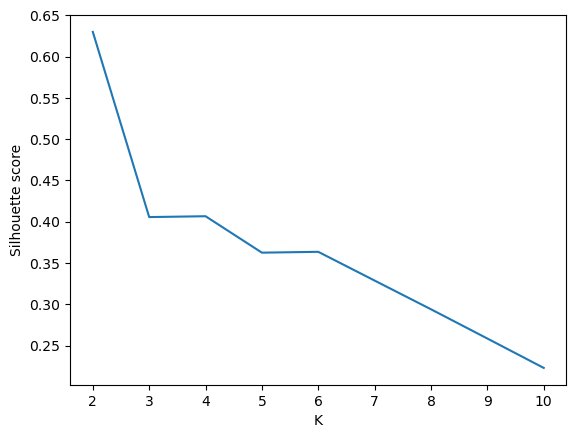

In [8]:
silhouettes = []
X = hot_encoded2.drop(columns=['Score_PCA_2_scaled'])

# Try multiple k
for k in range(2, 11):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

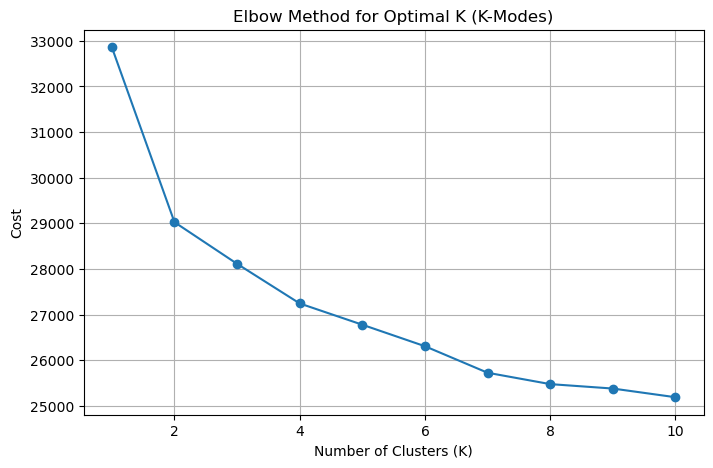

In [9]:
# Initialize variables for Elbow Method
cost = []
K_values = range(1, 11)  # Test K from 1 to 10

# Apply K-modes for different values of K
for K in K_values:
    km = KModes(n_clusters=K, init="Huang", n_init=5, random_state=42)
    km.fit(X)
    cost.append(km.cost_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_values, cost, marker="o")
plt.title("Elbow Method for Optimal K (K-Modes)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


In [10]:
# Step 2: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
pd.DataFrame(scaled_data)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.926260,-0.765298,1.796694,1.006413,-0.534479,-0.180952,-0.440680,-0.479855,-0.607781,1.812093,...,3.215001,-0.273397,-0.266308,-0.478645,1.365724,-1.522271,-1.749041,-1.813022,-0.310566,-0.288235
1,0.926260,-0.963897,1.796694,1.006413,-0.534479,-0.180952,-0.440680,-0.479855,1.645329,1.812093,...,-0.311042,-0.273397,-0.266308,-0.478645,1.365724,0.826753,1.272381,0.406993,2.674584,3.469390
2,-1.079611,-0.467400,-0.556578,-0.993628,1.870982,-0.180952,-0.440680,-0.479855,1.645329,1.812093,...,-0.311042,-0.273397,3.755048,2.089230,-0.732212,0.826753,1.272381,0.406993,3.047728,-0.288235
3,-1.079611,1.022093,1.796694,-0.993628,-0.534479,-0.180952,2.269223,-0.479855,-0.607781,-0.551848,...,-0.311042,-0.273397,-0.266308,2.089230,-0.732212,-1.522271,-0.238330,-1.813022,-0.315748,-0.288235
4,-1.079611,0.029098,-0.556578,1.006413,-0.534479,-0.180952,-0.440680,-0.479855,-0.607781,-0.551848,...,3.215001,-0.273397,-0.266308,2.089230,-0.732212,-1.522271,-1.749041,0.406993,0.477182,-0.288235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0.926260,-0.268801,1.796694,1.006413,-0.534479,-0.180952,-0.440680,-0.479855,-0.607781,1.812093,...,-0.311042,-0.273397,-0.266308,-0.478645,1.365724,0.826753,1.272381,0.406993,0.089687,-0.288235
3907,0.926260,-0.665999,-0.556578,-0.993628,-0.534479,-0.180952,2.269223,-0.479855,-0.607781,-0.551848,...,-0.311042,-0.273397,-0.266308,-0.478645,-0.732212,-0.347759,-0.238330,-1.813022,-0.328808,-0.288235
3908,-1.079611,0.525595,-0.556578,-0.993628,-0.534479,-0.180952,-0.440680,-0.479855,-0.607781,1.812093,...,-0.311042,-0.273397,-0.266308,2.089230,-0.732212,0.826753,-0.238330,0.406993,-0.393486,-0.288235
3909,0.926260,-0.765298,1.796694,1.006413,-0.534479,-0.180952,-0.440680,2.083962,-0.607781,-0.551848,...,-0.311042,-0.273397,-0.266308,-0.478645,1.365724,-1.522271,-0.238330,0.406993,-0.331296,-0.288235


In [11]:

# Step 4: Apply KMeans Clustering with Optimal k (Assume 3 for this example)
n_clusters = 2  # Replace with the optimal k determined from the elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Step 5: Add Cluster Labels to the Original Data
hot_encoded2['Cluster'] = clusters


# Check Cluster Counts
print("\nCluster Sizes:")
print(hot_encoded2['Cluster'].value_counts())




Cluster Sizes:
Cluster
0    2174
1    1737
Name: count, dtype: int64


In [30]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Prepare data for model
X = hot_encoded2.drop(columns=['Cluster', 'Score_PCA_2_scaled']).dropna()  # Features
y = hot_encoded2['Cluster'].dropna()  # Cluster labels

# Convert categorical features to dummy variables (if needed)
X_encoded = pd.get_dummies(X, drop_first=True)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded, y)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
feature_importances


Feature Importances:


,Feature,Importance
0,ActorGender,0.365118
1,ActorHeight,0.190702
20,No_Beard,0.068121
8,Big_Nose,0.047457
28,Wavy_Hair,0.042200
3,Attractive,0.038773
2,Arched_Eyebrows,0.034114
4,Bags_Under_Eyes,0.023240
32,AvgRuntime,0.017200
17,High_Cheekbones,0.016873


C:\Users\HP\AppData\Local\Temp\ipykernel_13500\1059710496.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




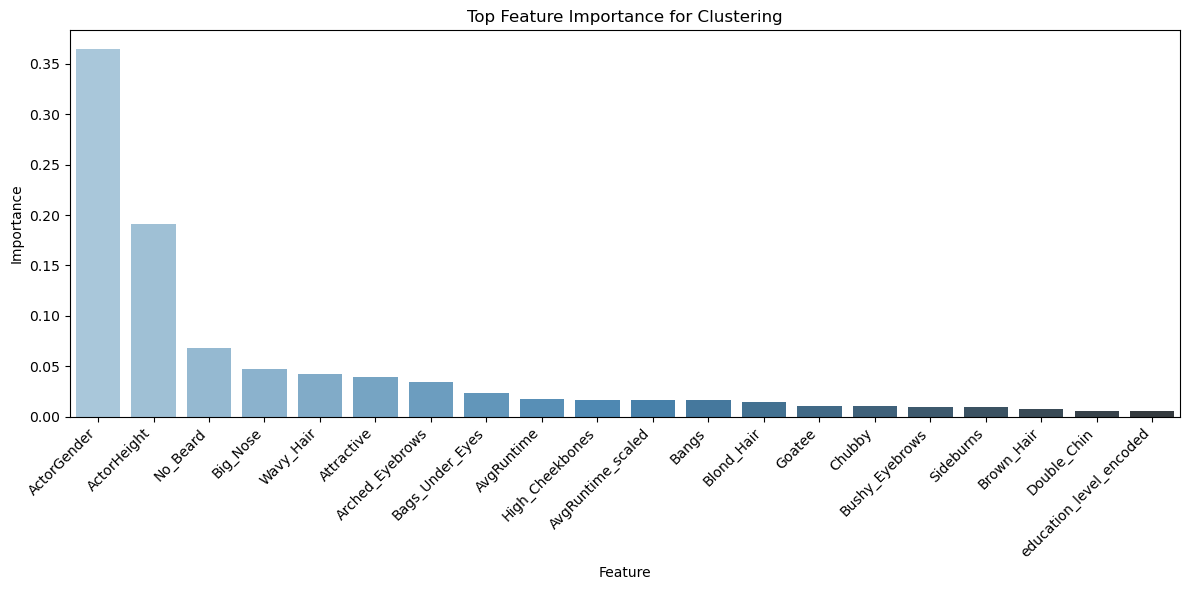

In [29]:
import matplotlib.pyplot as plt

# Assuming 'feature_importance' is a DataFrame with 'Feature' and 'Importance' columns
# Sort features by importance
feature_importance = feature_importances.sort_values(by='Importance', ascending=False)

# Select top N features for better visibility
top_n = 20
top_features = feature_importance.head(top_n)

# Plot improved feature importance chart
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(
    x='Feature', 
    y='Importance', 
    data=top_features, 
    palette='Blues_d'
)

# Improve x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add title and labels
plt.title("Top Feature Importance for Clustering")
plt.xlabel("Feature")
plt.ylabel("Importance")

plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()


In [12]:
hot_encoded2['Score_PCA_2_scaled'].mean()


1.7579083101208848

In [13]:
mean_score_by_cluster = hot_encoded2.groupby('Cluster')['Score_PCA_2_scaled'].describe()
print("Mean Score by Cluster:")
print(mean_score_by_cluster)

Mean Score by Cluster:
          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0        2174.0  1.627316  0.980409  0.206925  1.136065  1.331694  1.674605   
1        1737.0  1.921355  1.154555  0.330850  1.218616  1.521838  2.151902   

              max  
Cluster            
0        7.243004  
1        7.732999  


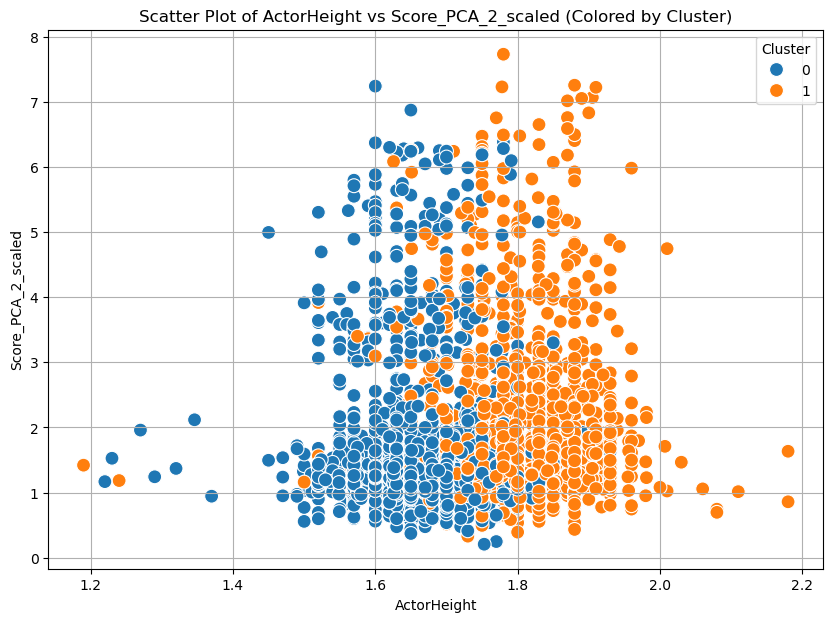

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'ActorHeight' and 'Score' with the actual numerical columns you want to plot
x_feature = 'ActorHeight'  # Feature for the x-axis
y_feature = 'Score_PCA_2_scaled'        # Feature for the y-axis

# Scatter Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=hot_encoded2, x=x_feature, y=y_feature, hue='Cluster', palette='tab10', s=100)
plt.title(f"Scatter Plot of {x_feature} vs {y_feature} (Colored by Cluster)")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


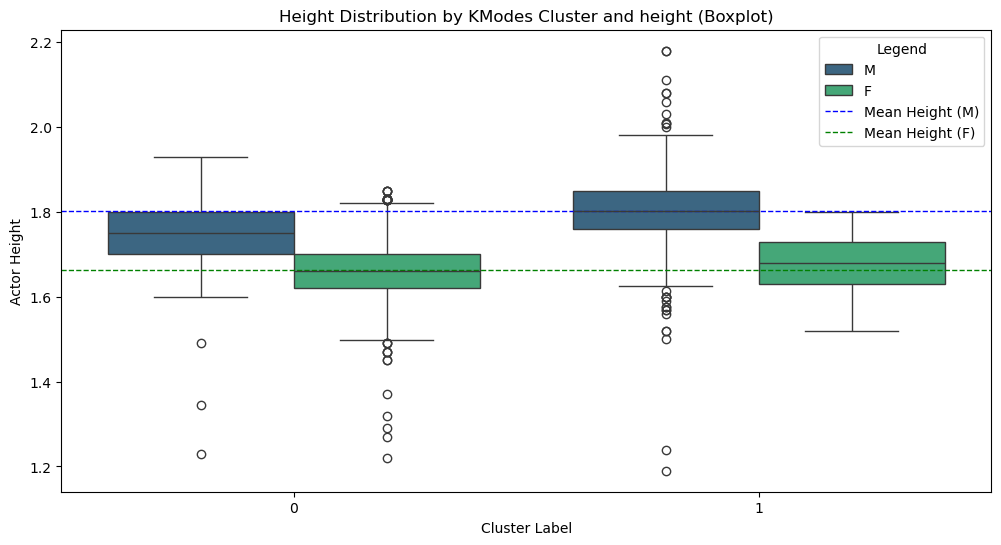

In [38]:
# Calculate means for ActorGender_F (0 and 1) across all clusters
mean_height_gender_0 = hot_encoded2[hot_encoded2['ActorGender'] == 0]['ActorHeight'].mean()
mean_height_gender_1 = hot_encoded2[hot_encoded2['ActorGender'] == 1]['ActorHeight'].mean()

# Create a boxplot for height by cluster and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=hot_encoded2, x='Cluster', y='ActorHeight', hue='ActorGender', palette='viridis')

# Add mean lines
plt.axhline(mean_height_gender_0, color='blue', linestyle='--', linewidth=1, label='Mean Height (Gender M)')
plt.axhline(mean_height_gender_1, color='green', linestyle='--', linewidth=1, label='Mean Height (Gender F)')

# Manually adjust the legend
handles, labels = plt.gca().get_legend_handles_labels()
gender_map = {'0.0': 'M', '1.0': 'F', 'Mean Height (Gender M)': 'Mean Height (M)', 'Mean Height (Gender F)': 'Mean Height (F)'}
labels = [gender_map[label] if label in gender_map else label for label in labels]
plt.legend(handles, labels, title="Legend", loc='upper right')

# Add plot details
plt.title("Height Distribution by KModes Cluster and height (Boxplot)")
plt.xlabel("Cluster Label")
plt.ylabel("Actor Height")
plt.show()


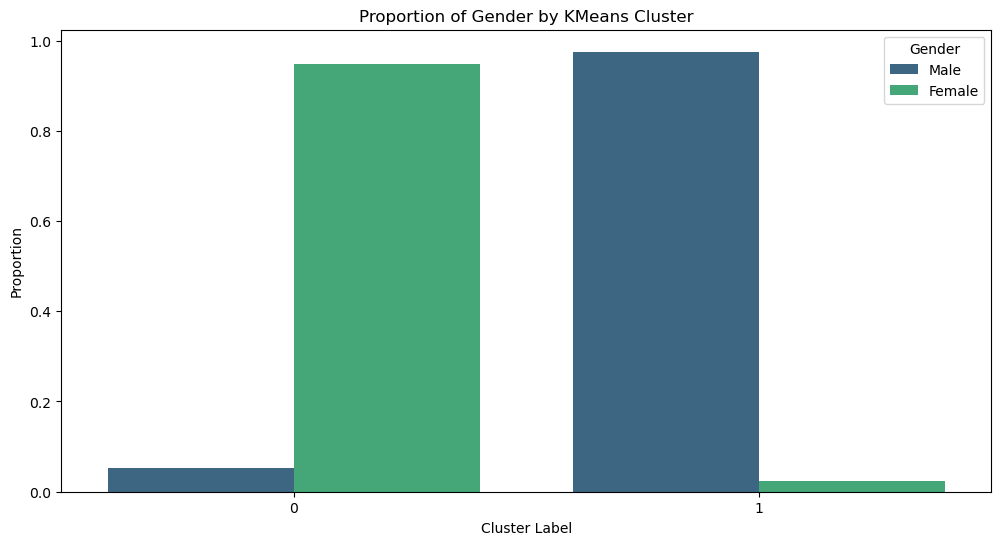

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate proportions
gender_cluster_proportions = (
    hot_encoded2.groupby(['Cluster', 'ActorGender'])
    .size()
    .reset_index(name='Count')
)
gender_cluster_proportions['Proportion'] = (
    gender_cluster_proportions.groupby('Cluster')['Count'].transform(lambda x: x / x.sum())
)

# Map ActorGender for the plot without modifying the dataset
gender_cluster_proportions['ActorGender'] = gender_cluster_proportions['ActorGender'].map({0: 'Male', 1: 'Female'})

# Plot the proportions
plt.figure(figsize=(12, 6))
sns.barplot(
    data=gender_cluster_proportions,
    x='Cluster',
    y='Proportion',
    hue='ActorGender',
    palette='viridis'
)

# Add plot details
plt.title("Proportion of Gender by KMeans Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Proportion")
plt.legend(title="Gender")
plt.show()


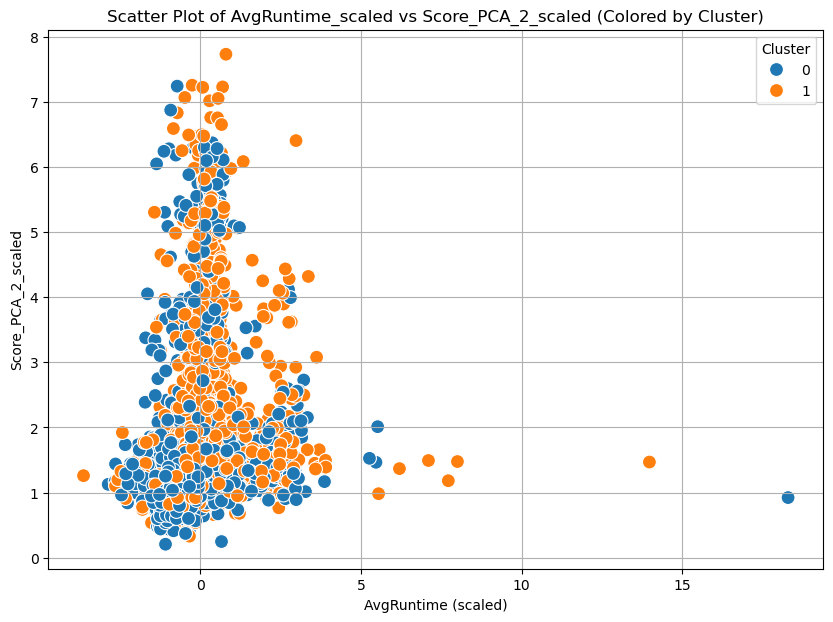

In [17]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the AvgRuntime column
scaler = StandardScaler()
hot_encoded2['AvgRuntime_scaled'] = scaler.fit_transform(hot_encoded2[['AvgRuntime']])

# Replace 'AvgRuntime' with the scaled version in the plot
x_feature = 'AvgRuntime_scaled'  # Use the scaled feature for the x-axis
y_feature = 'Score_PCA_2_scaled' # Feature for the y-axis

# Scatter Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=hot_encoded2, x=x_feature, y=y_feature, hue='Cluster', palette='tab10', s=100)
plt.title(f"Scatter Plot of {x_feature} vs {y_feature} (Colored by Cluster)")
plt.xlabel("AvgRuntime (scaled)")
plt.ylabel(y_feature)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


# Age analysis

In [18]:
hot_encoded['ActorAgeAtRelease'].dropna()

0                      [nan]
1                      [nan]
2                      [nan]
3                      [nan]
4                     [39.0]
                 ...        
119222                [35.0]
119223          [26.0, 30.0]
119224                [23.0]
119225          [22.0, 36.0]
119226    [43.0, 39.0, 24.0]
Name: ActorAgeAtRelease, Length: 119227, dtype: object

In [19]:
df_cleaned = hot_encoded[hot_encoded["ActorAgeAtRelease"].apply(lambda x: not (len(x) == 1 and pd.isna(x[0])))]
df_cleaned["ActorAgeAtRelease"]

4                                                    [39.0]
10                                                   [35.0]
11                                                   [29.0]
12        [33.0, 36.0, 30.0, 34.0, 33.0, 36.0, 36.0, 35....
14        [47.0, 60.0, 60.0, 47.0, 55.0, 40.0, 51.0, 59....
                                ...                        
119222                                               [35.0]
119223                                         [26.0, 30.0]
119224                                               [23.0]
119225                                         [22.0, 36.0]
119226                                   [43.0, 39.0, 24.0]
Name: ActorAgeAtRelease, Length: 62743, dtype: object

Moyenne des âges : 44.78
Médiane des âges : 44.00
Écart-type des âges : 14.34


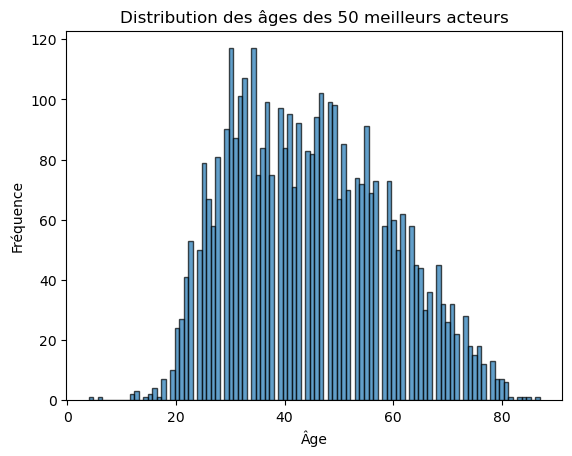

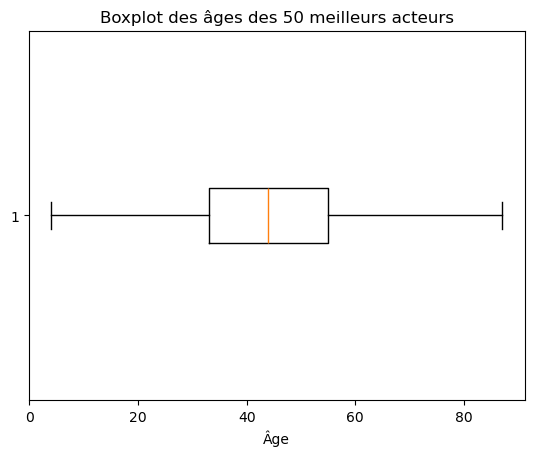

C:\Users\HP\AppData\Local\Temp\ipykernel_13500\3985763972.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ages, shade=True)


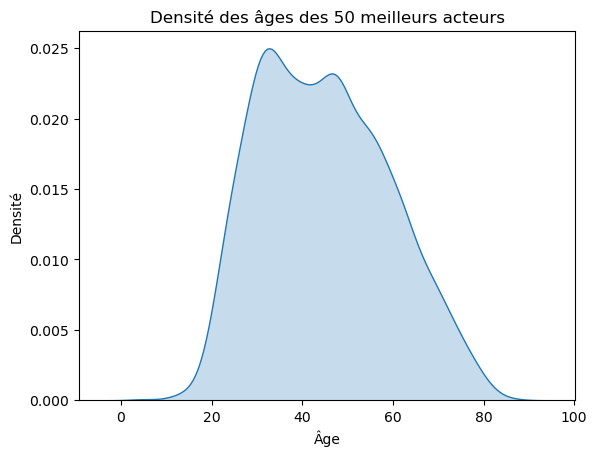

In [20]:

# 1. Trier par métrique de succès et prendre les 50 meilleurs acteurs
top_actors = df_cleaned.nlargest(50, "Score_PCA_2_scaled")

# 2. Extraire les âges des 50 meilleurs acteurs
ages = top_actors["ActorAgeAtRelease"].explode()  # Aplatir les listes
ages = ages.dropna().astype(float)  # Nettoyer et convertir en float

# 3. Statistiques descriptives
mean_age = ages.mean()
median_age = ages.median()
std_age = ages.std()
print(f"Moyenne des âges : {mean_age:.2f}")
print(f"Médiane des âges : {median_age:.2f}")
print(f"Écart-type des âges : {std_age:.2f}")

# 4. Visualisations

# Histogramme
plt.hist(ages, bins=100, edgecolor='k', alpha=0.7)
plt.title("Distribution des âges des 50 meilleurs acteurs")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# Boxplot
plt.boxplot(ages, vert=False)
plt.title("Boxplot des âges des 50 meilleurs acteurs")
plt.xlabel("Âge")
plt.show()

# KDE (optionnel : courbe de densité)
import seaborn as sns
sns.kdeplot(ages, shade=True)
plt.title("Densité des âges des 50 meilleurs acteurs")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.show()

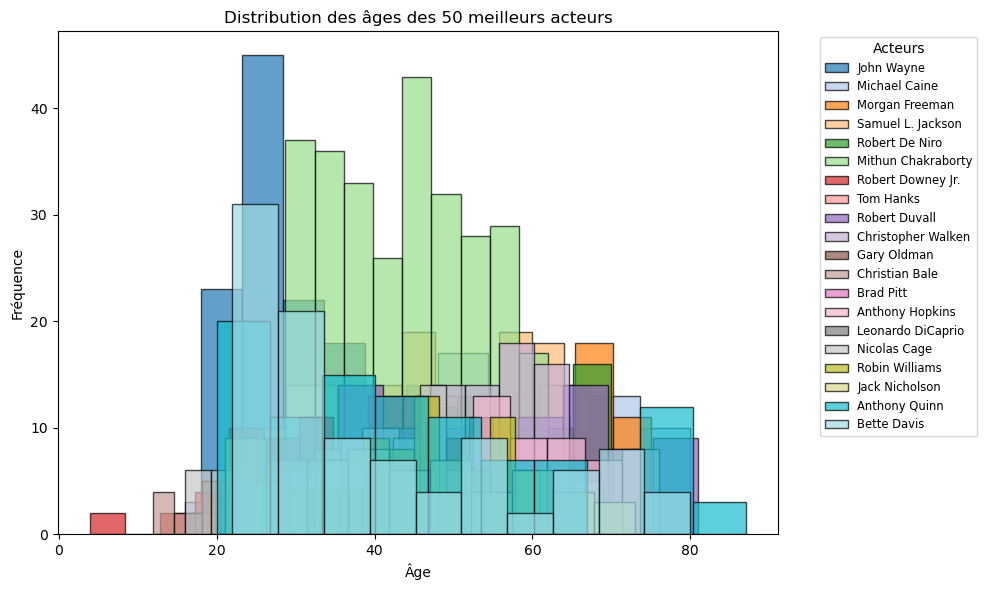

C:\Users\HP\AppData\Local\Temp\ipykernel_13500\3985062696.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actor_ages, shade=False, color=colors[actor], label=actor)
C:\Users\HP\AppData\Local\Temp\ipykernel_13500\3985062696.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actor_ages, shade=False, color=colors[actor], label=actor)
C:\Users\HP\AppData\Local\Temp\ipykernel_13500\3985062696.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actor_ages, shade=False, color=colors[actor], label=actor)
C:\Users\HP\AppData\Local\Temp\ipykernel_13500\3985062696.py:30: FutureWarning: 

`shade` is now deprecated in favo

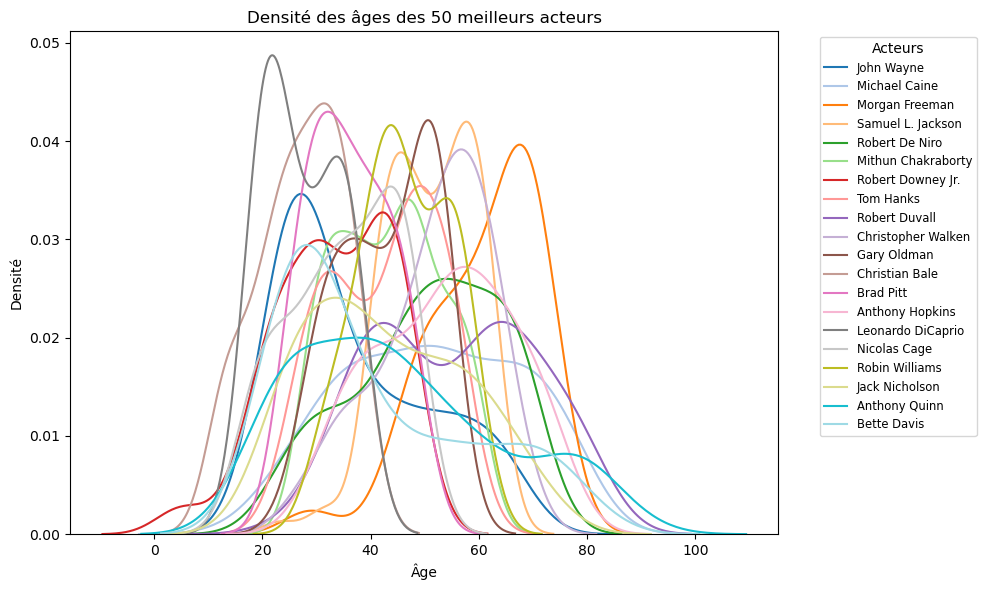

In [21]:
# 1. Trier par métrique de succès et prendre les 50 meilleurs acteurs
top_actors = df_cleaned.nlargest(20, "Score_PCA_2_scaled")

# 2. Extraire les âges et associer chaque âge à son acteur
top_ages = top_actors.explode("ActorAgeAtRelease")[["ActorName", "ActorAgeAtRelease"]]
top_ages = top_ages.dropna()
top_ages["ActorAgeAtRelease"] = top_ages["ActorAgeAtRelease"].astype(float)

# 3. Associer une couleur unique à chaque acteur
unique_actors = top_ages["ActorName"].unique()
colors = {actor: plt.cm.tab20(i / len(unique_actors)) for i, actor in enumerate(unique_actors)}

# 4. Visualisation : Histogramme avec une couleur par acteur
plt.figure(figsize=(10, 6))
for actor in unique_actors:
    actor_ages = top_ages[top_ages["ActorName"] == actor]["ActorAgeAtRelease"]
    plt.hist(actor_ages, bins=10, alpha=0.7, color=colors[actor], label=actor, edgecolor="k")

plt.title("Distribution des âges des 50 meilleurs acteurs")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title="Acteurs")
plt.tight_layout()
plt.show()

# 5. Visualisation : KDE (Densité) avec une couleur par acteur
plt.figure(figsize=(10, 6))
for actor in unique_actors:
    actor_ages = top_ages[top_ages["ActorName"] == actor]["ActorAgeAtRelease"]
    sns.kdeplot(actor_ages, shade=False, color=colors[actor], label=actor)

plt.title("Densité des âges des 50 meilleurs acteurs")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title="Acteurs")
plt.tight_layout()
plt.show()

In [22]:
!pip install plotly

In [23]:
top_actors = df_cleaned.nlargest(100, "Score_PCA_2_scaled")


In [24]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go



# 1. Trier par métrique de succès et prendre les 20 meilleurs acteurs

# 2. Extraire les âges et préparer les données pour chaque acteur
top_ages = top_actors.explode("ActorAgeAtRelease")[["ActorName", "ActorAgeAtRelease"]]
top_ages = top_ages.dropna()
top_ages["ActorAgeAtRelease"] = top_ages["ActorAgeAtRelease"].astype(float)

# 3. Création d'un plot interactif avec Plotly
fig = go.Figure()

# Ajouter une courbe KDE pour chaque acteur
unique_actors = top_ages["ActorName"].unique()
for actor in unique_actors:
    actor_ages = top_ages[top_ages["ActorName"] == actor]["ActorAgeAtRelease"]
    fig.add_trace(
        go.Histogram(
            x=actor_ages,
            name=actor,
            opacity=0.7,
            histnorm='density',  # Normaliser pour densité
            visible=False,  # Toutes les courbes sont initialement masquées
        )
    )

# Afficher uniquement la première courbe par défaut
fig.data[0].visible = True

# Ajouter un bouton pour chaque acteur
buttons = []
for i, actor in enumerate(unique_actors):
    buttons.append(
        dict(
            label=actor,
            method="update",
            args=[
                {"visible": [j == i for j in range(len(unique_actors))]},  # Masquer toutes les courbes sauf celle sélectionnée
                {"title": f"Distribution des âges de {actor}"}
            ],
        )
    )

# Ajouter les boutons au layout
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            x=1.15,  # Position du menu
            y=0.5,
            showactive=True,
        )
    ],
    title="Distribution des âges des acteurs",
    xaxis_title="Âge",
    yaxis_title="Densité",
    barmode="overlay",
)

# Afficher le plot
fig.show()


In [25]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde



# 1. Sort by success metric and take the top 20 actors
top_actors = df_cleaned.nlargest(20, "Score_PCA_2_scaled")

# 2. Extract ages and prepare data for each actor
top_ages = top_actors.explode("ActorAgeAtRelease")[["ActorName", "ActorAgeAtRelease"]]
top_ages = top_ages.dropna()
top_ages["ActorAgeAtRelease"] = top_ages["ActorAgeAtRelease"].astype(float)

# 3. Create an interactive Plotly figure
fig = go.Figure()

# Add KDE curve for each actor
unique_actors = top_ages["ActorName"].unique()
for actor in unique_actors:
    actor_ages = top_ages[top_ages["ActorName"] == actor]["ActorAgeAtRelease"]
    if len(actor_ages) > 1:  # KDE requires at least 2 data points
        kde = gaussian_kde(actor_ages)
        x_vals = np.linspace(actor_ages.min(), actor_ages.max(), 200)
        y_vals = kde(x_vals)
        fig.add_trace(
            go.Scatter(
                x=x_vals,
                y=y_vals,
                mode="lines",
                name=actor,
                visible=False,  # Initially hidden
            )
        )

# Show only the first KDE curve by default
fig.data[0].visible = True

# Create a dropdown menu for selecting actors
buttons = []
for i, actor in enumerate(unique_actors):
    buttons.append(
        dict(
            label=actor,
            method="update",
            args=[
                {"visible": [j == i for j in range(len(unique_actors))]},  # Show only the selected actor's KDE
                {"title": f"Distribution des âges de {actor}"}
            ],
        )
    )

# Add dropdown menu to the layout
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            x=1.15,
            y=0.5,
            showactive=True,
        )
    ],
    title="Distribution des âges des acteurs",
    xaxis_title="Âge",
    yaxis_title="Densité",
)

# Show the plot
fig.show()


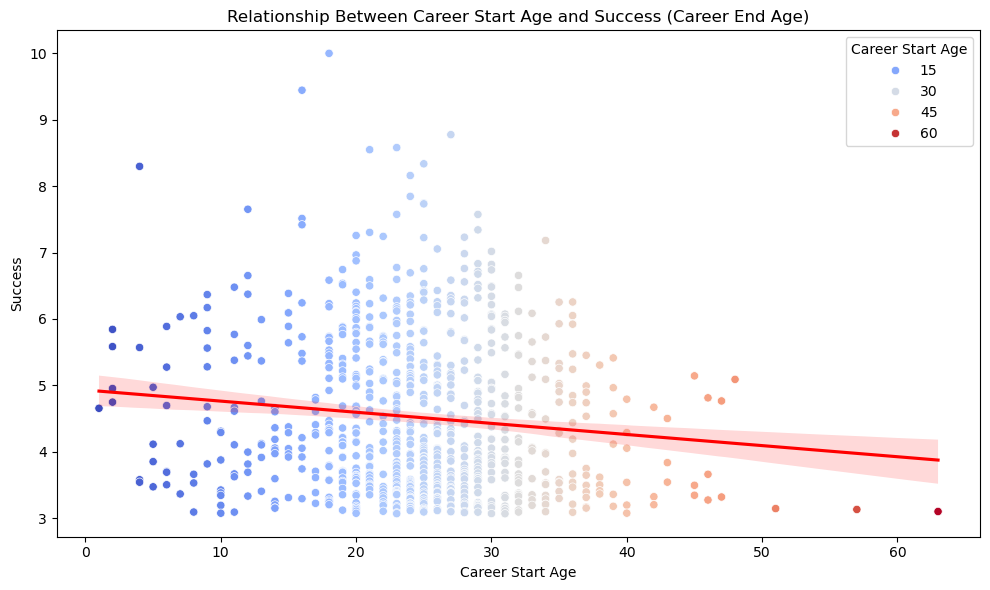

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

top_actors = df_cleaned.nlargest(1000, "Score_PCA_2_scaled")

# Assuming df_cleaned is your preprocessed dataset with CareerStartAge, CareerEndAge, and CareerLength columns
top_actors["CareerStartAge"] = top_actors["ActorAgeAtRelease"].apply(lambda x: min(x) if isinstance(x, list) and len(x) > 0 else np.nan)
top_actors["CareerEndAge"] = top_actors["ActorAgeAtRelease"].apply(lambda x: max(x) if isinstance(x, list) and len(x) > 0 else np.nan)
top_actors["CareerLength"] = top_actors["CareerEndAge"] - top_actors["CareerStartAge"]
top_actors = top_actors[top_actors["CareerStartAge"] > 0]
top_actors = top_actors[top_actors["CareerEndAge"] > 0]
top_actors = top_actors[top_actors["CareerLength"] > 0]


# Scatter plot: Career Start Age vs. Success (Career End Age)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_actors, 
    x="CareerStartAge", 
    y="Score_PCA_2_scaled", 
    hue="CareerStartAge", 
    palette="coolwarm", 
    sizes=(50, 200)
)

# Add a regression line
sns.regplot(
    data=top_actors, 
    x="CareerStartAge", 
    y="Score_PCA_2_scaled", 
    scatter=False, 
    color="red", 
    line_kws={"label": "Trend Line"}
)

# Titles and labels
plt.title("Relationship Between Career Start Age and Success (Career End Age)")
plt.xlabel("Career Start Age")
plt.ylabel("Success")
plt.legend(title="Career Start Age")
plt.tight_layout()
plt.show()
